In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import sys
sys.path.append('../../')

from denn.config.config import get_config
from denn.algos import train_GAN
from denn.models import MLP
from denn.experiments import gan_experiment, get_problem

Session not detected. You should not be calling `report` outside `tune.run` or while using the class API. 
  File "C:\Users\Public\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Public\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\Public\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Public\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Public\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "C:\Users\Public\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\Public\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
    self._run_once()
  File "C:\Users\Public\anaconda3\lib\as

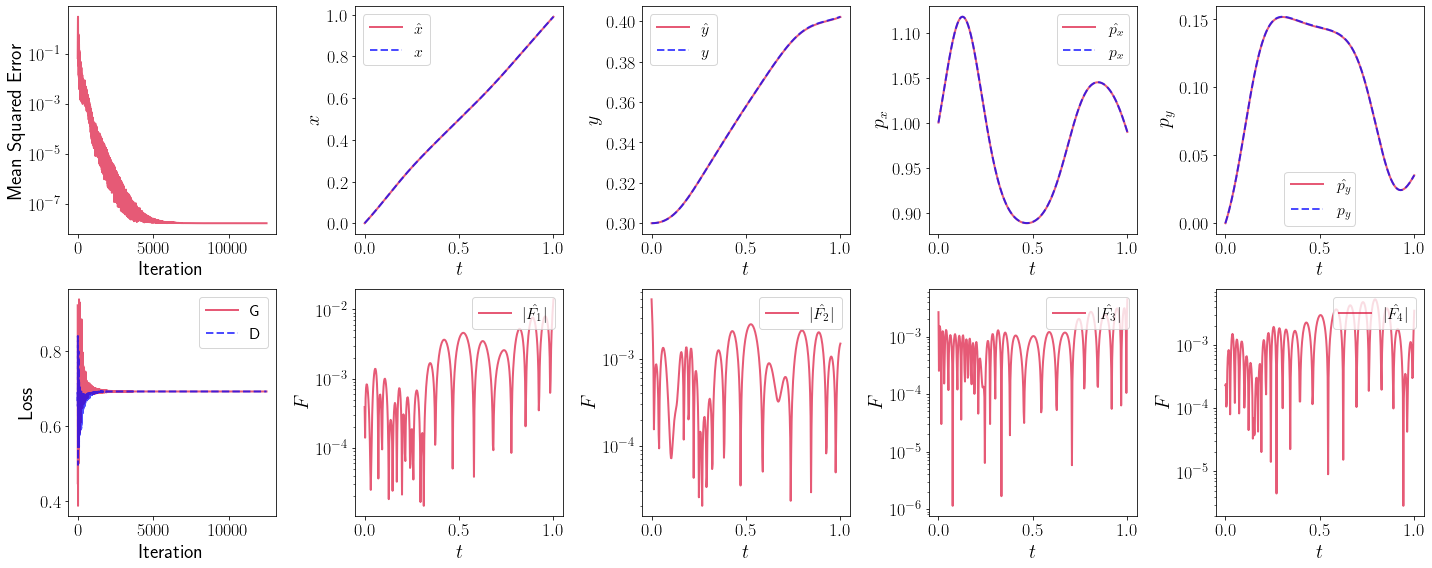

In [3]:
# select the rays problem
original_params = get_config("rays")
original_params['training']['noise'] = False
original_params['training']['log'] = False
original_params['training']['save'] = False

# set IC for training
original_params['problem']['y0'] = [0.3]
original_params['training']['multihead'] = False
original_params['generator']['n_heads'] = 1
original_params['generator']['pretrained'] = False
original_params['discriminator']['n_heads'] = 1

original_res = gan_experiment("rays", original_params)

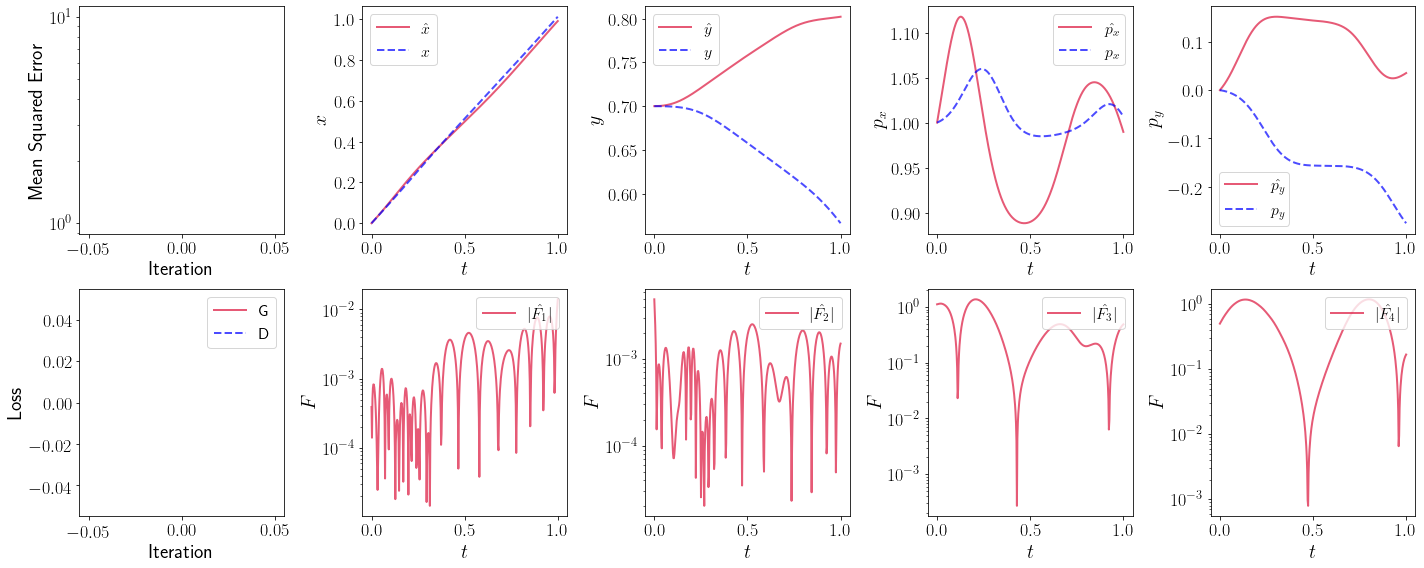

In [7]:
# make a copy of params and change IC
transfer_params = original_params.copy()
transfer_params['problem']['y0'] = [0.7]
transfer_problem = get_problem("rays", transfer_params)

# get pretrained generator and new discriminator (which will not be used)
G = original_res['model']
D = MLP(**transfer_params['discriminator'])

# set training to 0 iterations and get solutions
transfer_params['training']['niters'] = 0

transfer_res = train_GAN(G, D, transfer_problem, **transfer_params['training'], config=transfer_params)